<a href="https://colab.research.google.com/github/itsmimahi/EDA-Capstone/blob/main/My_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
##Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
##Explore and analyze the data to discover key factors responsible for app engagement and success.

#**We Are Going To Answer These Questions** 


1.   What are the top 5 apps on the basis of installs?
2.   What is the top 5 expensive apps?
3.   What is the top 5 reviewed apps?
4.   What are the top 5 most installed apps in game category?
5.   Which 5 apps from the family category are having the lowest rating?

In [138]:
# Importing required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [139]:
# code to remove warnings which is showing at top of the plot or graph
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

In [140]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
# uploading given dataset and creating dataframe 
path = '/content/drive/MyDrive/EDA'
app_df = pd.read_csv(path+'/Play Store Data.csv')
review_df = pd.read_csv(path+'/User Reviews.csv')

###1. app_df is dataframe which contain Data of Play store applications.
###2. review_df is dataframe which contain Data of Users reviews. 


# `DATA EXPLORATION`

In [142]:
app_df.info



<bound method DataFrame.info of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE

In [143]:
app_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [144]:
app_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [145]:
review_df.info

<bound method DataFrame.info of                                App  \
0            10 Best Foods for You   
1            10 Best Foods for You   
2            10 Best Foods for You   
3            10 Best Foods for You   
4            10 Best Foods for You   
...                            ...   
64290  Houzz Interior Design Ideas   
64291  Houzz Interior Design Ideas   
64292  Houzz Interior Design Ideas   
64293  Houzz Interior Design Ideas   
64294  Houzz Interior Design Ideas   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2                                                    NaN       NaN   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
...                                                  ...       ...   
64290                

In [146]:
review_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [147]:
review_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


## `Cleaning Data`

looking for a columnn in which there are such values which are unnecessarily there, and somewhere there is also a missing value.

In [148]:
# Duplicate values in our datset.
app_df.duplicated().sum()

483

In [149]:
# Removing duplicate rows.
app_df.drop_duplicates(inplace = True)
app_df.duplicated().sum()

0

In [150]:
# each app should have singole entry in app dataset.
app_df.App.value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Theme Android P Black design for LG V30          1
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9660, dtype: int64

In [151]:
# Now we can see that same app has diffrant entry only the small diffrance in that apps is in reviews.
app_df[app_df['App']== '8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


In [152]:
# There are such column which has null or missing values.
app_df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## `Rating`

In [153]:
# As we can see that Rsting column has most null values which are near about 1465.
# So now its become necessity to remove all that null values from that column.

app_df.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [154]:
# Rating column contain outlier such as 19 and nan, we have remove this values.
app_df['Rating'].replace(np.nan, round(app_df['Rating'].mean(), 1), inplace = True)
app_df['Rating'].replace(19, round(app_df['Rating'].mean(), 1), inplace = True)

Text(0, 0.5, 'Rating')

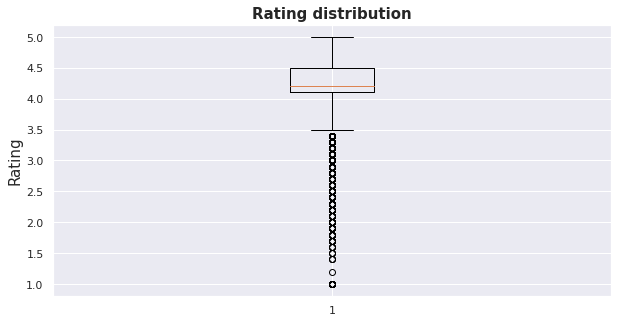

In [155]:
# Box plot 
plt.figure(figsize=(10,5))
Rating_list = list(app_df['Rating'].unique())
plt.boxplot(app_df.Rating)
plt.title('Rating distribution', size=15, fontweight='bold')
plt.ylabel('Rating', size=15)

# `Reviews`

In [156]:
# reviews data contains some values in  Million format such as 200M,100M,etc so we need to convert it in numeric by using ( 1M =1000000)
app_df['Reviews'] = pd.to_numeric(app_df['Reviews'], errors='coerce')

In [157]:
app_df['Reviews'].unique()

array([1.59000e+02, 9.67000e+02, 8.75100e+04, ..., 6.03000e+02,
       1.19500e+03, 3.98307e+05])

# `Size`

In [158]:
app_df['Size'].unique()[:10]

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M'], dtype=object)

In [159]:
# 1000+ values is in column of Size, we have to remove this.
x = app_df[app_df['Size']== '1000+'].index
app_df.drop(axis=0, inplace=True, index=x)

In [160]:
app_df.Size

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10358, dtype: object

In [161]:
def remove_end_letter(Size):
  if Size[-1]=='M':
    Size=Size[:-1]
    return float(Size)
  elif Size[-1]=='k':
    return float(Size[:-1])/1000
  else:
    return 0.0

In [162]:
app_df['Size']=app_df['Size'].apply(remove_end_letter)


In [163]:
# Replacing 0.0 value with mean value
app_df['Size']= app_df['Size'].replace(0.0, app_df['Size'].mean())

##`Installs`

In [164]:
app_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [165]:
# Code to  remove free value in installs column.
app_df=app_df[app_df['Installs']!= 'Free']

app_df = app_df.reset_index()

In [167]:
app_df.Installs=app_df.Installs.apply(lambda x : str(x))

In [168]:
# data cleaning of Installs column
app_df.Installs=app_df.Installs.apply(lambda x : x.replace(',','') if ',' in x else x)
app_df.Installs=app_df.Installs.apply(lambda x : x.replace('+','') if '+' in x else x)
app_df.Installs=app_df.Installs.apply(lambda x : float(x))

In [169]:
app_df.Installs

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10352        5000.0
10353         100.0
10354        1000.0
10355        1000.0
10356    10000000.0
Name: Installs, Length: 10357, dtype: float64

##`'Type', 'Currunt version' and 'Android version'`

In [170]:
app_df.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

In [171]:
# mode of categorical value
print(app_df['Type'].mode())
print(app_df['Android Ver'].mode())
print(app_df['Current Ver'].mode())


0    Free
dtype: object
0    4.1 and up
dtype: object
0    Varies with device
dtype: object


In [172]:
app_df.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

##`Price`

In [173]:
app_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [174]:
# Data cleaning for Price column
app_df['Price'] = app_df['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
app_df['Price'] = app_df['Price'].apply(lambda x: str(x).replace('Everyone','0') if 'Everyone' in str(x) else str(x))
app_df['Price'] = app_df['Price'].apply(lambda x: str(x))

## `Content rating`

In [175]:
app_df['Content Rating'].value_counts()

Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

## ` Last updated`

In [176]:
app_df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [177]:
app_df.info

<bound method DataFrame.info of        index                                                App  \
0          0     Photo Editor & Candy Camera & Grid & ScrapBook   
1          1                                Coloring book moana   
2          2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3          3                              Sketch - Draw & Paint   
4          4              Pixel Draw - Number Art Coloring Book   
...      ...                                                ...   
10352  10836                                   Sya9a Maroc - FR   
10353  10837                   Fr. Mike Schmitz Audio Teachings   
10354  10838                             Parkinson Exercices FR   
10355  10839                      The SCP Foundation DB fr nn5n   
10356  10840      iHoroscope - 2018 Daily Horoscope & Astrology   

                  Category  Rating   Reviews       Size    Installs  Type  \
0           ART_AND_DESIGN     4.1     159.0  19.000000     10000.0  Free   
1        

# `User Review dataset`

In [178]:
review_df.info

<bound method DataFrame.info of                                App  \
0            10 Best Foods for You   
1            10 Best Foods for You   
2            10 Best Foods for You   
3            10 Best Foods for You   
4            10 Best Foods for You   
...                            ...   
64290  Houzz Interior Design Ideas   
64291  Houzz Interior Design Ideas   
64292  Houzz Interior Design Ideas   
64293  Houzz Interior Design Ideas   
64294  Houzz Interior Design Ideas   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2                                                    NaN       NaN   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
...                                                  ...       ...   
64290                

In [179]:
review_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [180]:
review_df[review_df['Translated_Review'].isnull() & review_df['Sentiment'].isnull() & review_df['Sentiment_Polarity'].isnull() & review_df['Sentiment_Subjectivity'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [181]:
review_df = review_df.drop(review_df[(review_df['Translated_Review'].isnull()) & (review_df['Sentiment'].isnull()) & (review_df['Sentiment_Polarity'].isnull()) & (review_df['Sentiment_Subjectivity'].isnull())].index)
review_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [182]:
# Addition of both null values counts and non-null values which is exactly the same as our orignal dataset
37432+26863

64295

In [183]:
review_df=review_df[~review_df['Translated_Review'].isnull()]
review_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [184]:
review_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [185]:
review_df.Sentiment_Polarity.describe()

count    37427.000000
mean         0.182171
std          0.351318
min         -1.000000
25%          0.000000
50%          0.150000
75%          0.400000
max          1.000000
Name: Sentiment_Polarity, dtype: float64

* Cleaning column 'App'

In [186]:
review_df.App.unique()

array(['10 Best Foods for You', '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室',
       '11st', '1800 Contacts - Lens Store',
       '1LINE – One Line with One Touch',
       '2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif',
       '21-Day Meditation Experience',
       '2Date Dating App, Love and matching',
       '2GIS: directory & navigator', '2RedBeans',
       '2ndLine - Second Phone Number',
       '30 Day Fitness Challenge - Workout at Home',
       '365Scores - Live Scores', '3D Live Neon Weed Launcher',
       '4 in a Row', '4K Wallpapers and Ultra HD Backgrounds',
       '591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價房貸查詢', '591房屋交易-香港',
       '7 Cups: Anxiety & Stress Chat', '7 Day Food Journal Challenge',
       '7 Minute Workout', '7 Weeks - Habit & Goal Tracker',
       '8 Ball Pool', '850 Sports News Digest',
       '8fit Workouts & Meal Planner', '95Live -SG#1 Live Streaming App',
       'A Call From Santa Claus!', 'A Word A Day',
       'A&E - Watch Full Episodes of TV Shows',
 

In [187]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [188]:
review_df.duplicated().sum()

7735

# Joined dataset (Inner join)

In [189]:
combine_df = pd.merge(app_df, review_df, how= 'inner', on='App')

In [190]:
combine_df.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [191]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59163 entries, 0 to 59162
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   59163 non-null  int64  
 1   App                     59163 non-null  object 
 2   Category                59163 non-null  object 
 3   Rating                  59163 non-null  float64
 4   Reviews                 59163 non-null  float64
 5   Size                    59163 non-null  float64
 6   Installs                59163 non-null  float64
 7   Type                    59163 non-null  object 
 8   Price                   59163 non-null  object 
 9   Content Rating          59163 non-null  object 
 10  Genres                  59163 non-null  object 
 11  Last Updated            59163 non-null  object 
 12  Current Ver             59163 non-null  object 
 13  Android Ver             59163 non-null  object 
 14  Translated_Review       59163 non-null

In [192]:
combine_df.isnull().value_counts()

index  App    Category  Rating  Reviews  Size   Installs  Type   Price  Content Rating  Genres  Last Updated  Current Ver  Android Ver  Translated_Review  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity
False  False  False     False   False    False  False     False  False  False           False   False         False        False        False              False      False               False                     59163
dtype: int64

In [193]:
df = combine_df[['Installs', 'Rating', 'Reviews','Size','Price']]

In [194]:
df.corr()

,Installs,Rating,Reviews,Size
Installs,1.000000,-0.018281,0.512699,0.076388
Rating,-0.018281,1.000000,0.116852,0.132973
Reviews,0.512699,0.116852,1.000000,0.333959
Size,0.076388,0.132973,0.333959,1.000000


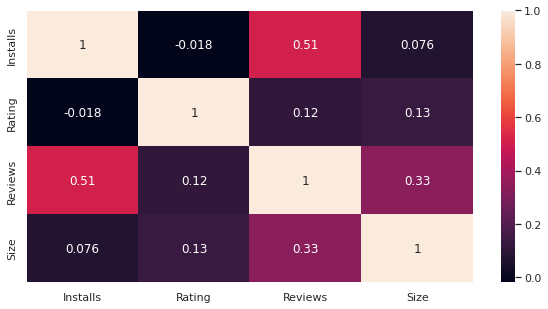

In [195]:
from IPython.core.pylabtools import figsize
sns.set_style('whitegrid')
plt.figure(figsize(10,5))
sns.heatmap(df.corr(), annot=True)

# `Visualisation and insignts`

In [196]:
combine_df.head(2)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333


# `Top 10 app categories by installaation`

In [197]:
top10_category = app_df.groupby(['Category']).agg({'Installs': np.sum}).sort_values('Installs', ascending=False)
top10_category.sort_values('Installs',ascending=False)

,Installs
Category,
GAME,3.154402e+10
COMMUNICATION,2.415228e+10
SOCIAL,1.251387e+10
PRODUCTIVITY,1.246309e+10
TOOLS,1.145277e+10
FAMILY,1.004169e+10
PHOTOGRAPHY,9.721248e+09
TRAVEL_AND_LOCAL,6.361887e+09
VIDEO_PLAYERS,6.222003e+09


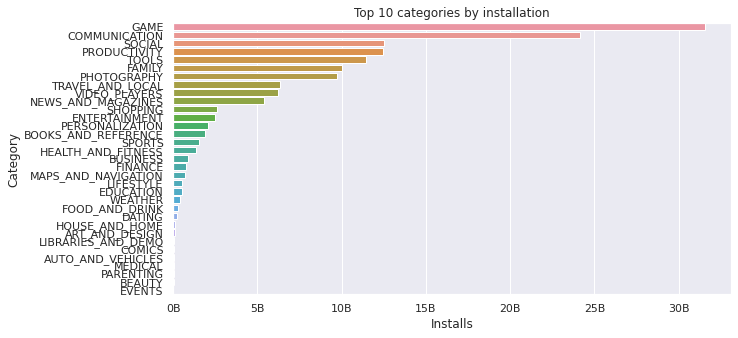

In [198]:
# ax = plt.subplots()  
sns.set(style='darkgrid')
g=sns.barplot(y=top10_category.index,x='Installs',data=top10_category,orient='h')
xlabels = ['{:,.0f}'.format(x) + 'B' for x in g.get_xticks()/1000000000]
g.set_xticklabels(xlabels)
plt.title('Top 10 categories by installation')
plt.show()

## `Top 5 app in each category by installation`


that would help in detrmining potential categorty to inter in for app making. Top five apps in each category would helps us to identify our competitors.

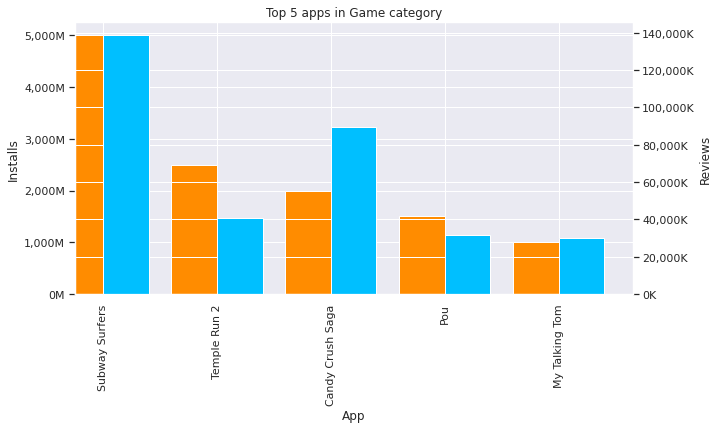

<Figure size 1080x576 with 0 Axes>

In [199]:
# Top 5 GAME app
fig = plt.figure() # Create matplotlib figure
plt.figure(figsize=(15,8))

import matplotlib.ticker as ticker

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
top5game_app_by_install=app_df[app_df['Category']=='GAME'].groupby(['App']).agg({'Installs':np.sum,'Reviews':np.sum}).sort_values('Installs',ascending=False).head()
top5game_app_by_install.Installs.plot(kind='bar', color='darkorange', ax=ax, width=width, position=1)
top5game_app_by_install.Reviews.plot(kind='bar', color='deepskyblue', ax=ax2, width=width, position=0)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

ax.set_ylabel('Installs')
ax.set_title('Top 5 apps in Game category')
ax2.set_ylabel('Reviews')

plt.show()
            




**Observation:** Subway Surfers app  is on top in the game category by installations and reviews.

In [200]:
app_df['Reviews'].head()

0       159.0
1       967.0
2     87510.0
3    215644.0
4       967.0
Name: Reviews, dtype: float64

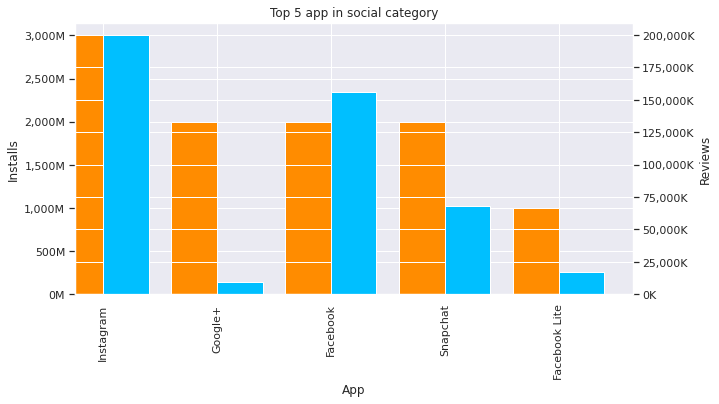

<Figure size 1080x576 with 0 Axes>

In [201]:
# Top 5 social App

fig = plt.figure()     
plt.figure(figsize=(15,8))

import matplotlib.ticker as ticker

ax = fig.add_subplot(111)
ax2= ax.twinx()

width = 0.4
top5_social_app_by_install = app_df[app_df['Category'] == 'SOCIAL'].groupby(['App']).agg({'Installs': np.sum, 'Reviews': np.sum}).sort_values('Installs', ascending = False).head()
top5_social_app_by_install.Installs.plot(kind='bar', color='darkorange', ax=ax , width=width, position=1)
top5_social_app_by_install.Reviews.plot(kind='bar',color='deepskyblue', ax=ax2, width=width, position = 0)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

ax.set_ylabel('Installs')
ax.set_title('Top 5 app in social category')
ax2.set_ylabel('Reviews')

plt.show()
                                         
                                         

## **OBSERVATION** : Instagram app in on top in social category.

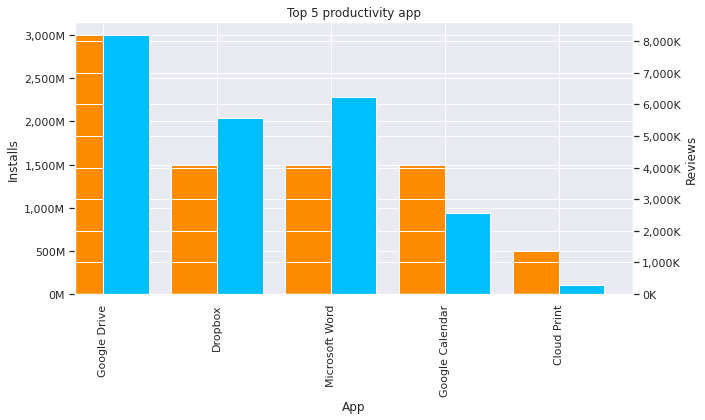

<Figure size 1080x576 with 0 Axes>

In [202]:
# Top 5 productivity app.

fig = plt.figure()
plt.figure(figsize(15,8))

import matplotlib.ticker as ticker

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4
top5_productivity_app_by_installs = app_df[app_df['Category']=='PRODUCTIVITY'].groupby(['App']).agg({'Installs': np.sum, 'Reviews': np.sum})\
.sort_values('Installs', ascending = False). head()
top5_productivity_app_by_installs.Installs.plot(kind='bar', color='darkorange', ax=ax, width=width, position=1)
top5_productivity_app_by_installs.Reviews.plot(kind='bar', color='deepskyblue', ax=ax2, width=width, position=0)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000)+ 'M'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000)+ 'K'))


ax.set_ylabel('Installs')
ax.set_title('Top 5 productivity app')
ax2.set_ylabel('Reviews')

plt.show()


**OBSERVATION** : Google Drive app is on productivity category on the basis of 'Installs' and 'Reviews'.

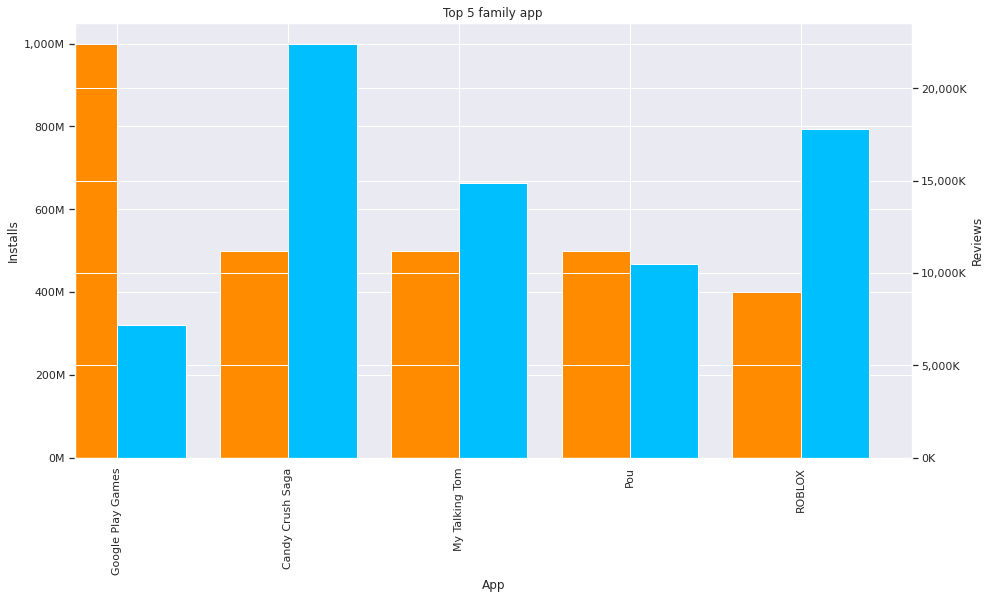

<Figure size 1080x720 with 0 Axes>

In [203]:
# Top 5 Family app.

fig = plt.figure()
plt.figure(figsize(15,10))

import matplotlib.ticker as ticker

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4
top5_family_app_by_installs = app_df[app_df['Category']=='FAMILY'].groupby(['App']).agg({'Installs': np.sum, 'Reviews': np.sum}).sort_values('Installs',ascending = False).head()
top5_family_app_by_installs.Installs.plot(kind='bar', color='darkorange', ax=ax, width=width, position=1)
top5_family_app_by_installs.Reviews.plot(kind='bar', color='deepskyblue', ax=ax2, width=width, position=0)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000000) + 'M'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

ax.set_ylabel('Installs')
ax.set_title('Top 5 family app')
ax2.set_ylabel('Reviews')

plt.show()

**OBSERVATION** : Google play games is on top in family category on the basis of 'Installs' and 'Reviews'.

Text(0.5, 1.0, 'Top 5 apps in photography category')

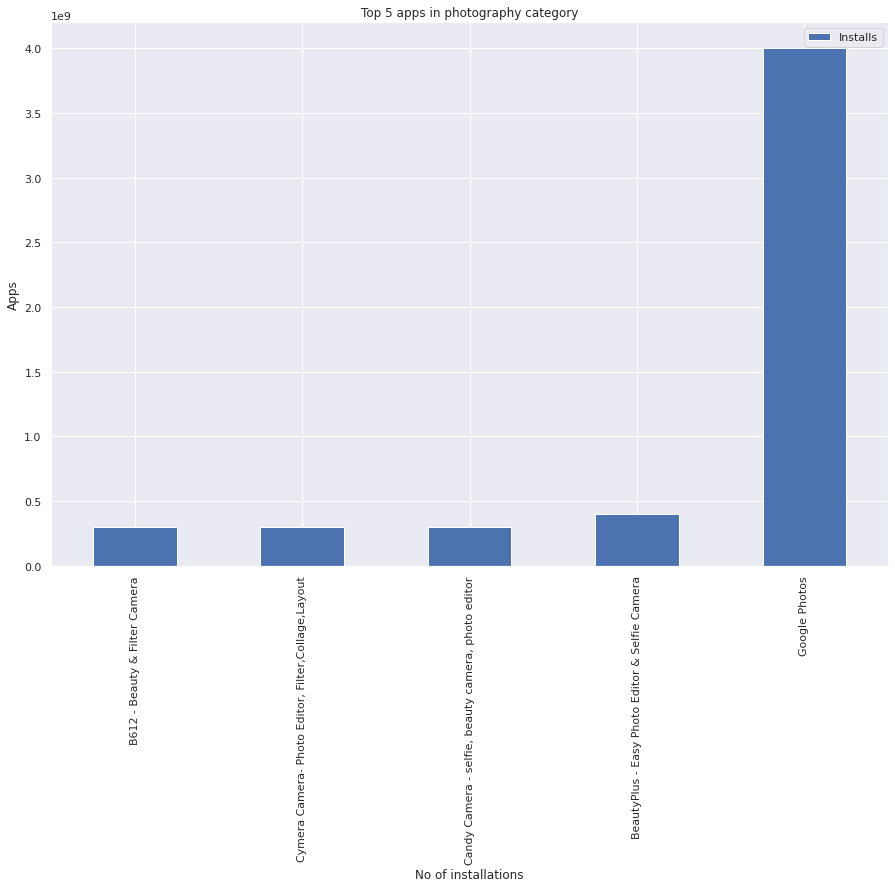

In [204]:
# Top 5 apps in photography.
top5_photography_app_installs = app_df[app_df['Category']=='PHOTOGRAPHY'].groupby(['App']).agg({'Installs': np.sum}).sort_values('Installs', ascending=False).head()
top5_photography_app_installs.sort_values('Installs').plot(kind='bar')

plt.xlabel('No of installations')
plt.ylabel('Apps')
plt.title('Top 5 apps in photography category')

**OBSERVATION** : Google photos app is on top in Photograpy category on the basis of 'Installs'.

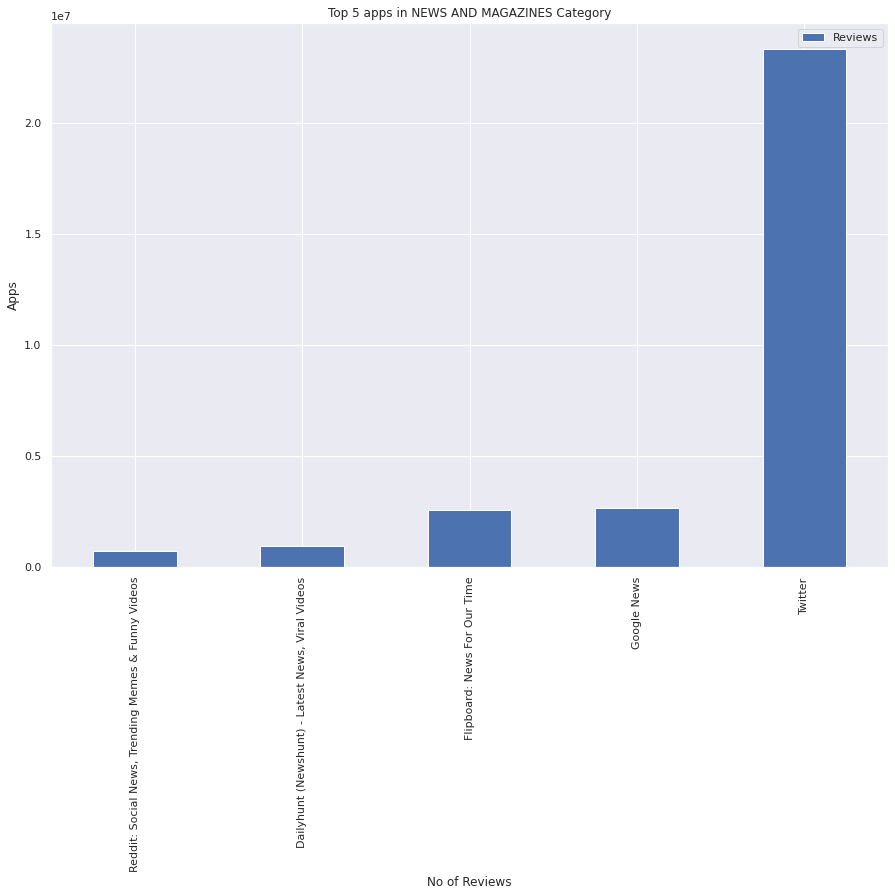

In [205]:
# Top 5 apps in NEWS AND MAGZINES category.
top5_newsandmagzines_app_by_reviews = app_df[app_df['Category']=='NEWS_AND_MAGAZINES'].groupby(['App']).agg({'Reviews': np.sum}).sort_values('Reviews', ascending=False).head()
top5_newsandmagzines_app_by_reviews.sort_values('Reviews').plot(kind='bar')
plt.xlabel('No of Reviews')
plt.ylabel('Apps')
plt.title('Top 5 apps in NEWS AND MAGAZINES Category')
plt.show()

In [206]:
top10_apps_by_install=app_df.groupby(['App']).agg({'Installs': np.mean}).sort_values('Installs',ascending=False).head(10)
top10_apps_by_install.sort_values('Installs')

,Installs
App,
Google,1.000000e+09
Google Street View,1.000000e+09
Subway Surfers,1.000000e+09
Facebook,1.000000e+09
Skype - free IM & video calls,1.000000e+09
Gmail,1.000000e+09
Google Chrome: Fast & Secure,1.000000e+09
Google Drive,1.000000e+09
Google News,1.000000e+09


Text(0.5, 1.0, 'Top 10 apps by reviews')

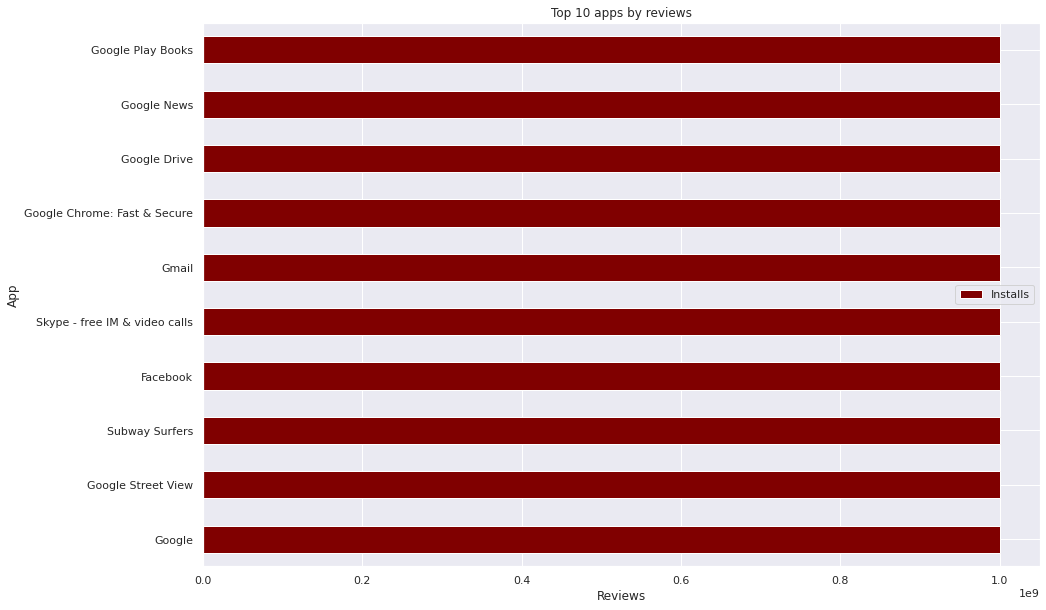

In [207]:
top10_apps_by_install.sort_values('Installs', ascending=False).plot.barh(color ='maroon')
# plt.show()
plt.xlabel('Reviews')
plt.title('Top 10 apps by reviews')

**OBSERVATION** : Google play books is most installed app in all category.

In [208]:
# We observed that some apps have many entries having defferent reviews. So, now group by on apps and aggregate on reviews to obtain single entry.
top10_apps_by_reviews=app_df.groupby(['App']).agg({'Reviews': np.mean}).sort_values('Reviews',ascending=False).head(10)

In [209]:
top10_apps_by_reviews

,Reviews
App,
Facebook,7.814326e+07
WhatsApp Messenger,6.911449e+07
Instagram,6.655489e+07
Messenger – Text and Video Chat for Free,5.664471e+07
Clash of Clans,4.488902e+07
Clean Master- Space Cleaner & Antivirus,4.291653e+07
Subway Surfers,2.772132e+07
YouTube,2.563943e+07
"Security Master - Antivirus, VPN, AppLock, Booster",2.490100e+07


Text(0.5, 1.0, 'Top 10 apps by reviews')

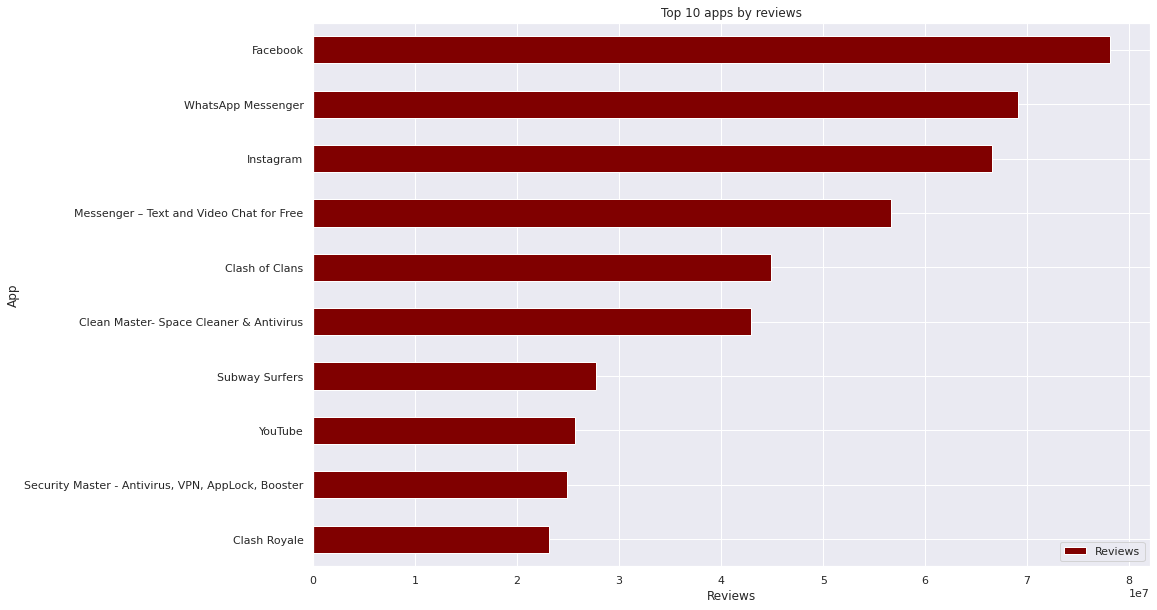

In [210]:
#top10_apps_by_reviews.sort_values('Reviews').plot.barh(color ='maroon')
top10_apps_by_reviews.sort_values('Reviews').plot.barh(color ='maroon')
#plt.show()
plt.xlabel('Reviews')
plt.title('Top 10 apps by reviews')

**OBSERVATION** : Facebook app has got most reviews in all category.

In [211]:
# Top 10 apps by size.
top10_apps_by_size = app_df.groupby(['App']).agg({'Size': np.mean}).sort_values('Size', ascending=False).head(10)
top10_apps_by_size

,Size
App,
Vi Trainer,100.0
Navi Radiography Pro,100.0
Hungry Shark Evolution,100.0
Ultimate Tennis,100.0
Draft Simulator for FUT 18,100.0
Stickman Legends: Shadow Wars,100.0
Talking Babsy Baby: Baby Games,100.0
Post Bank,100.0
Miami crime simulator,100.0


In [212]:
# Unique Apps.
print('reviews dataset:',review_df.App.nunique())
print('app dataset:', app_df.App.nunique())
print('combine dataset:', combine_df.App.nunique())

reviews dataset: 865
app dataset: 9659
combine dataset: 816


In [213]:
app_df[app_df['Installs']>app_df['Installs'].mean()].groupby(['App']).agg({'Rating':np.mean}).sort_values('Rating',ascending=False).head(10)

,Rating
App,
"DU Recorder – Screen Recorder, Video Editor, Live",4.8
Period Tracker - Period Calendar Ovulation Tracker,4.8
Piano Tiles 2™,4.7
Brightest Flashlight Free ®,4.7
Bubble Witch 3 Saga,4.7
Toy Blast,4.7
CATS: Crash Arena Turbo Stars,4.7
Bible,4.7
Calculator - unit converter,4.7


In [214]:
# Free and Paid Installation of top 10 categories
df=app_df[app_df['Category'].isin (['COMMUNICATION', 'SOCIAL', 'VIDEO_PLAYERS', 'PRODUCTIVITY',
       'PHOTOGRAPHY', 'GAME', 'TRAVEL_AND_LOCAL', 'ENTERTAINMENT',
       'NEWS_AND_MAGAZINES', 'TOOLS'])].groupby(['Category','Type']).agg({'Installs':np.mean})
df

Installs
Category           Type              
COMMUNICATION      Free  7.124164e+07
                   Paid  5.037222e+04
ENTERTAINMENT      Free  2.252716e+07
                   Paid  1.000000e+05
GAME               Free  3.036891e+07
                   Paid  2.542164e+05
NEWS_AND_MAGAZINES Free  2.058478e+07
                   Paid  2.750000e+03
PHOTOGRAPHY        Free  3.218301e+07
                   Paid  9.893700e+04
PRODUCTIVITY       Free  3.288042e+07
                   Paid  5.043054e+04
SOCIAL             Free  4.517640e+07
                   Paid  2.000000e+03
TOOLS              Free  1.496869e+07
                   Paid  2.214668e+04
TRAVEL_AND_LOCAL   Free  2.827424e+07
                   Paid  1.525500e+04
VIDEO_PLAYERS      Free  3.638557e+07
                   Paid  1.775000e+04


##* `Heatmap`  show correlattion between Rating,Reviews,Size,Installs,Price and update_year

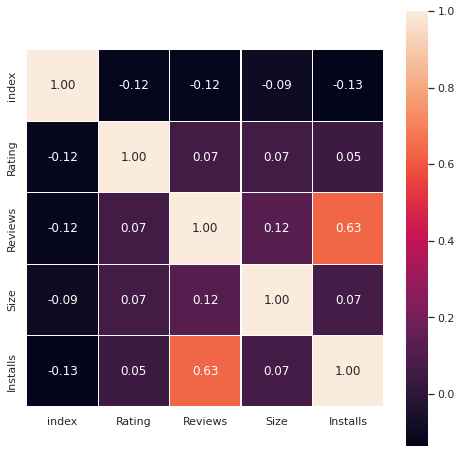

In [215]:
fig, axes=plt.subplots(figsize=(8,8))
sns.heatmap(app_df.corr(),ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show();

**OBSERVATION** : app installs and reviews are 63% positivly corelated and app size and updation year are 22% negativly corelated.

In [216]:
group_name = app_df['Content Rating'].value_counts().index
group_value = app_df['Content Rating'].value_counts().values

Text(0.5, 1.0, 'Distribution of Content Rating')

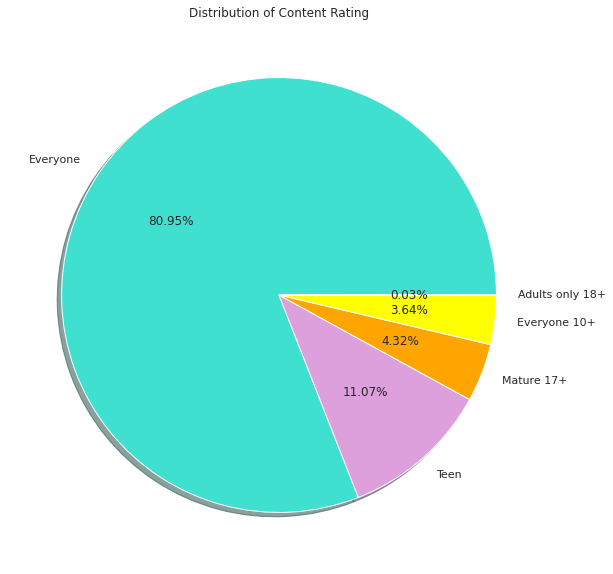

In [217]:
plt.pie(group_value[:5],labels=group_name[:5],autopct='%1.2f%%',shadow=True,colors=['turquoise','plum','orange','yellow','red']);
plt.title('Distribution of Content Rating')

**Observation:** 

*  In Play store App record, maximum **content rating** are from **Everyone** after that **Teen** and then **Mature 17+** and so on.

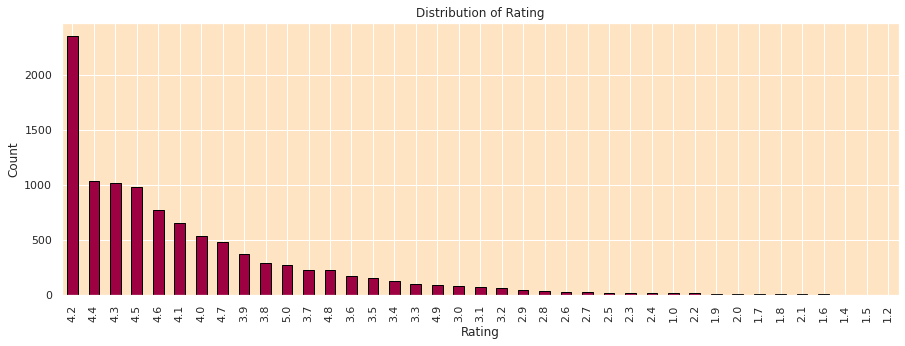

In [218]:
app_df['Rating'].value_counts().plot(kind="bar",figsize=(15,5),edgecolor='black',colormap='Spectral')
ax=plt.axes()
ax.set_facecolor('bisque')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Observation:** 

*   Most of the apps have ratings in the range of  3.8 to 4.8
*   4.2 rating is given by more than 2500 people.

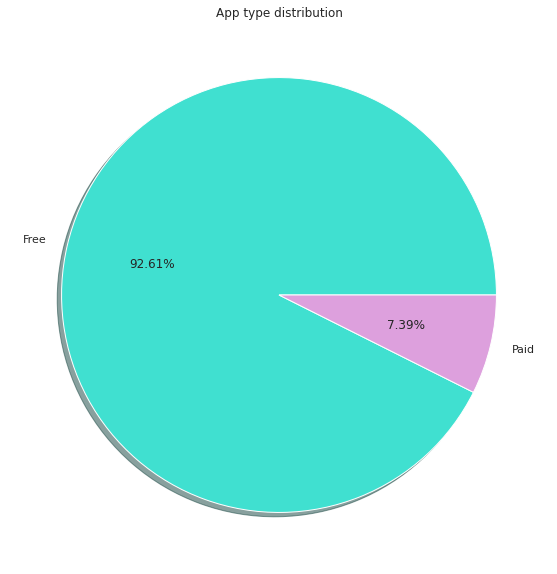

In [219]:
y = app_df['Type'].value_counts()
plt.pie(y,labels=('Free','Paid'),autopct='%1.2f%%', shadow=True,colors=['turquoise','plum'])
plt.title('App type distribution');

**Observation:**

*   92.62% apps in the Play Store are Free Apps.

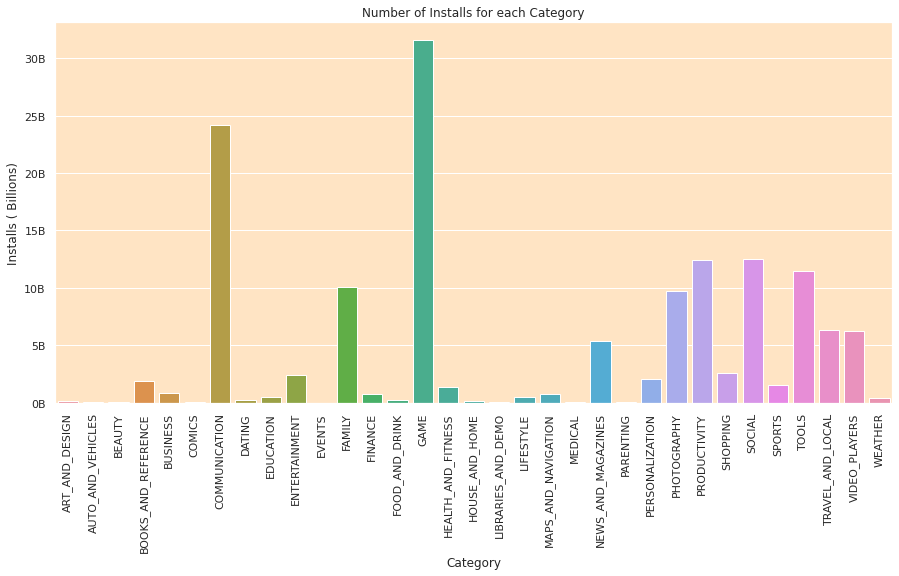

In [220]:
import matplotlib.ticker as ticker
categories=app_df.groupby('Category')
d=categories[['Installs']].sum().reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x='Category',y='Installs',data=d)
ax=plt.axes()
ax.set_facecolor('bisque')
plt.xticks(rotation=90)
plt.ylabel('Installs ( Billions)')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000000) + 'B'))
plt.title('Number of Installs for each Category')
plt.show()

**Observation**

*   Most of the apps being downloaded and installed are from the categories of **Game** and **Communication**. 
*   Categories of least downloaded app are **Parenting**, **Events** and **Beauty**.

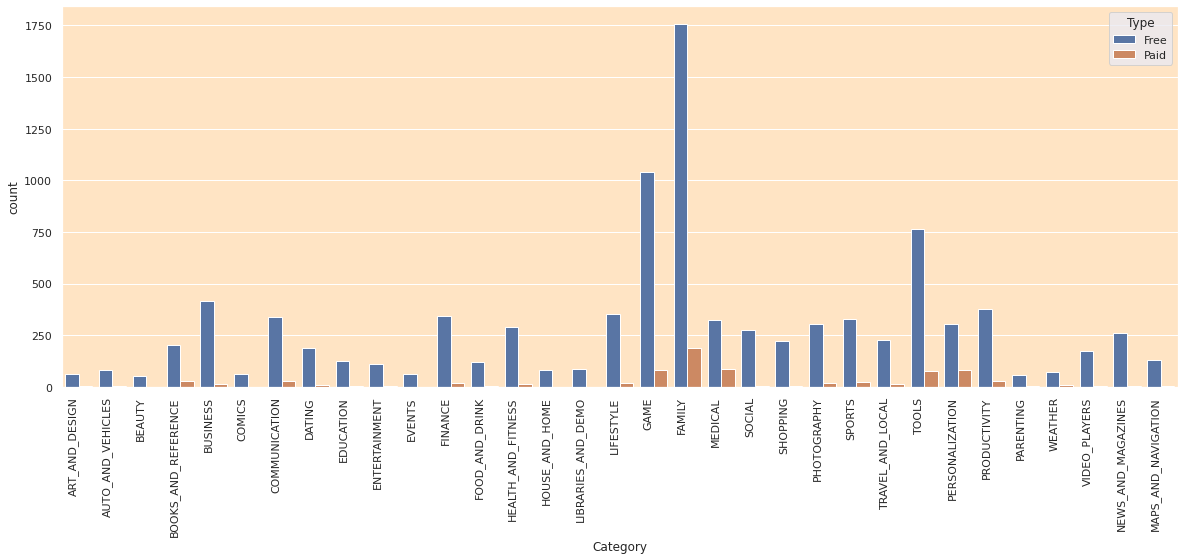

In [221]:
plt.figure(figsize=(20,7))
sns.countplot(x='Category',hue='Type',data=app_df)
ax=plt.axes()
ax.set_facecolor('bisque')
plt.xticks(rotation=90,horizontalalignment='right');

**Observation**: The above graph shows that most of the free and paid apps are from game and family category.

In [222]:
app_df['Price'] = app_df['Price'].apply(lambda x : float(x))


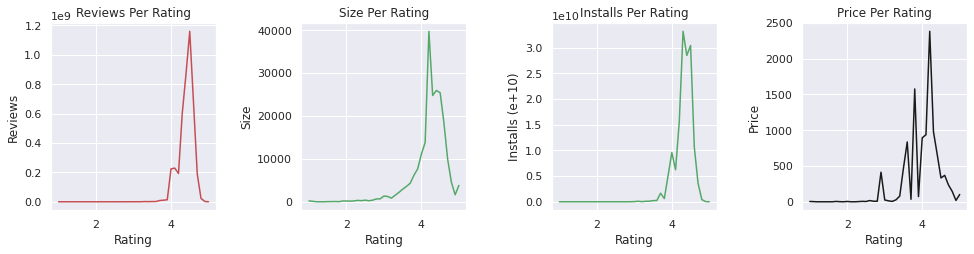

In [223]:
# plot the graphs of reviews, size, installs and price per rating
combine_plot = app_df.groupby('Rating').sum().reset_index()

fig, axes = plt.subplots(1, 4, figsize=(14, 4))

axes[0].plot(combine_plot['Rating'], combine_plot['Reviews'], 'r')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating')



axes[1].plot(combine_plot['Rating'], combine_plot['Size'], 'g')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating')


axes[2].plot(combine_plot['Rating'], combine_plot['Installs'], 'g')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Installs (e+10)')
axes[2].set_title('Installs Per Rating')


axes[3].plot(combine_plot['Rating'], combine_plot['Price'], 'k')
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating')


plt.tight_layout(pad=2)
plt.show()

**Observation**: Most of the apps with higher rating range of 3.8-4.7 are having high amount of reviews,size and installs.
In terms of price, It does not reflect direct relationship with rating.

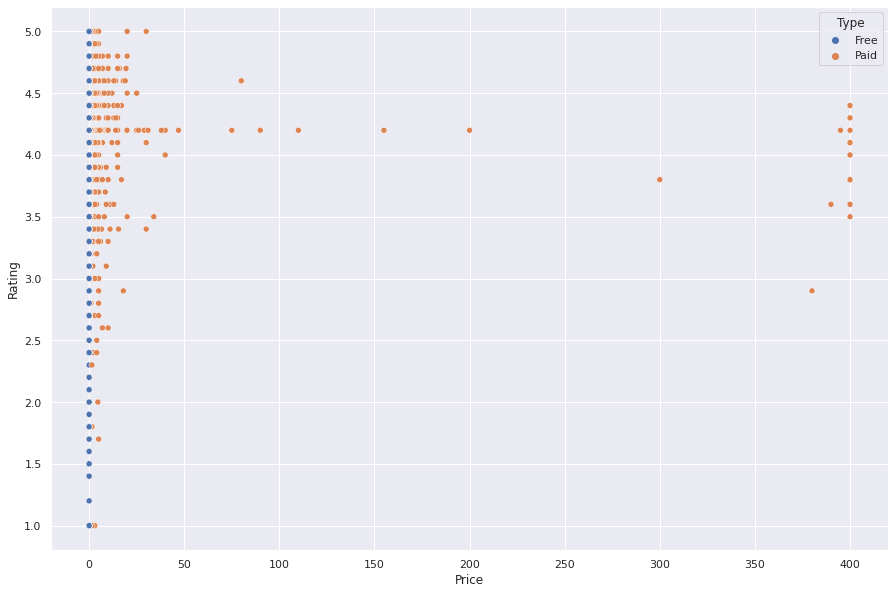

In [224]:
# Distribution of rating vs price
sns.scatterplot(data=app_df, x="Price", y="Rating",hue='Type')

**Observation**: The above scatter plot shows that most of the paid apps ratings are clustered in range of 3.5-5.

In [225]:
combine_df.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


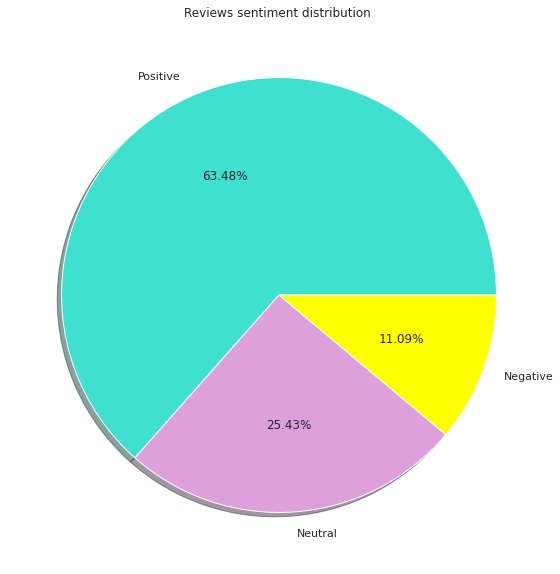

In [226]:
y=combine_df['Sentiment'].value_counts()
plt.pie(y,labels=['Positive','Neutral','Negative'],autopct='%1.2f%%',shadow=True,colors=['turquoise','plum','yellow'])
plt.title('Reviews sentiment distribution ');

**Observation**: The above pie chart shows that 63.48 % reviews is positive and 25.43 % reviews is neutral and 11.09% reviews is negative

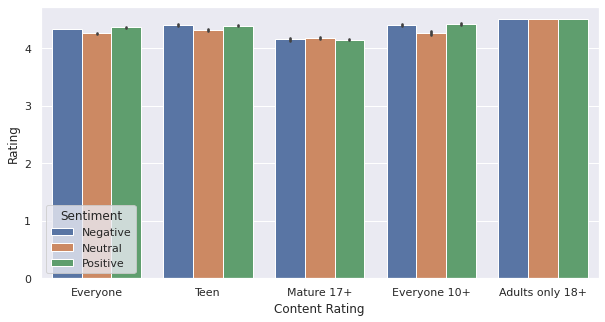

In [227]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=combine_df, x="Content Rating", y="Rating",hue='Sentiment')
images_dir='/content/drive/MyDrive/EDA Capston Project'

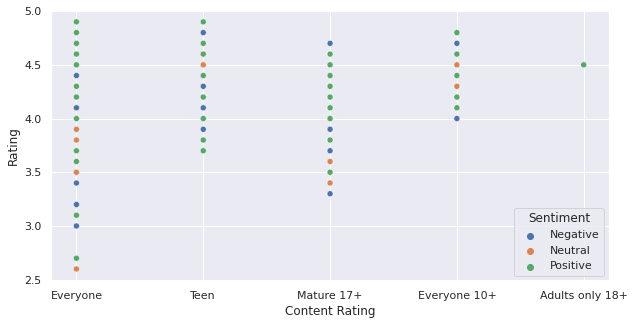

In [228]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=combine_df, x="Content Rating", y="Rating",hue='Sentiment')
images_dir='/content/drive/MyDrive/EDA Capston Project'

**Observation:** The above scatter plot shows that higher rating are haing positive sentiment whereas low and medium ratings have mixed sentiments, negative and positive